In [1]:
import h3
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from helper_functions.gridding import h3_grid

In [2]:
df = pd.DataFrame({})

for year in range(2000, 2024, 2):
  df_year = pd.read_csv(f'../../data/birds/{year}-{year+1}.csv')
  df = pd.concat([df, df_year])
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11393012 entries, 0 to 987437
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ScientificName  object 
 1   TaxonID         object 
 2   Date            object 
 3   Latitude        float64
 4   Longitude       float64
 5   Municipality    object 
dtypes: float64(2), object(4)
memory usage: 608.5+ MB


In [4]:
grid_object = h3_grid()
grid_object.fit(df)
grid_object.grid_info()

,h3_cell,observations_id,count,neighbors
0,85012603fffffff,"[83371, 83379, 83388, 83391, 83392, 83393, 833...",1450,"{8501260ffffffff, 85012603fffffff, 85012607fff..."
1,85012613fffffff,"[83372, 83373, 83374, 83375, 83376, 83377, 833...",1165,"{850126c7fffffff, 85012603fffffff, 85012617fff..."
2,85012617fffffff,"[1012023, 1106452, 1106453, 1106454, 1106455, ...",52,"{85012603fffffff, 85012617fffffff, 85012607fff..."
3,8501261bfffffff,"[4865, 4866, 5194, 5195, 653607, 2681, 4502, 4...",1365,"{850126c7fffffff, 85012657fffffff, 85012603fff..."
4,85012643fffffff,"[709475, 709476, 709477, 709478, 709479, 70948...",447,"{85012647fffffff, 85012653fffffff, 85012657fff..."
...,...,...,...,...
2063,85112ed3fffffff,"[196349, 530183, 537374, 569130, 582496, 61454...",2895,"{8511216ffffffff, 8511216bfffffff, 85112ed7fff..."
2064,85112ed7fffffff,"[197417, 205764, 403088, 530176, 530177, 70028...",2062,"{8511216ffffffff, 85112ed7fffffff, 85112ed3fff..."
2065,85112edbfffffff,"[196347, 196348, 268174, 268175, 268176, 66772...",3742,"{85112337fffffff, 85112ed3fffffff, 851123affff..."
2066,851135a7fffffff,[647965],1,"{851135affffffff, 851135a3fffffff, 851135b7fff..."


In [5]:
from inference.model import ActualDistribution
distribution = ActualDistribution('h3_cell', 'ScientificName')
distribution.fit(df)

(array([129., 342., 705., 598., 198.,  73.,  16.,   4.,   0.,   3.]),
 array([  1.,  40.,  79., 118., 157., 196., 235., 274., 313., 352., 391.]),
 <BarContainer object of 10 artists>)

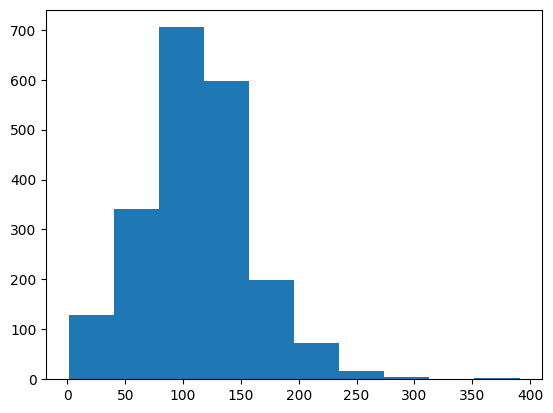

In [11]:
import matplotlib.pyplot as plt
def calculate_species_richness (row):
    return np.sum(row.to_numpy() > 0.0)

richness = distribution.dist_data.apply(calculate_species_richness, axis = 1)
richness = richness.to_frame()
richness.columns = ['richness']
plt.hist(richness)

In [16]:
def create_keystone_grid (keystone_name):
    df = pd.read_csv('../../data/keystone/{}.csv'.format(keystone_name))
    df = df.rename(columns = {"WGS84 N": "Latitude", "WGS84 E": "Longitude"})
    df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

    grid_object = h3_grid()
    grid_object.fit(df)
    return df, grid_object

In [17]:
ranunculus_glacialis_df, ranunculus_glacialis_grid = create_keystone_grid("ranunculusglacialis")
ranunculus_glacialis_grid.grid_info()

,h3_cell,observations_id,count,neighbors
0,8501268bfffffff,[721],1,"{850126c7fffffff, 85012683fffffff, 8501268bfff..."
1,8508e823fffffff,"[29, 30, 31, 32, 33, 34, 35, 180, 181, 182, 18...",27,"{8508e827fffffff, 8508e837fffffff, 8508e83bfff..."
2,8508e827fffffff,"[328, 329, 330, 331, 576, 577]",6,"{8508e827fffffff, 8508e837fffffff, 8508e82ffff..."
3,8508e82bfffffff,"[480, 481, 482, 695]",4,"{8508e877fffffff, 8508e83bfffffff, 8508e82ffff..."
4,8508e833fffffff,"[11, 370, 457, 521, 570]",5,"{8508e837fffffff, 8508e83bfffffff, 8508e8affff..."
5,8508e837fffffff,"[22, 40, 41, 42, 45, 46, 47, 57, 99, 112, 149,...",45,"{8508e827fffffff, 8508e9dbfffffff, 8508e837fff..."
6,8508e8a7fffffff,"[213, 460, 464, 468, 475, 546, 547, 548]",8,"{8508e8a7fffffff, 8508e9dbfffffff, 8508e8affff..."
7,8508e8affffffff,"[0, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 1...",264,"{8508e8a7fffffff, 8508e9dbfffffff, 8508e837fff..."
8,8508e953fffffff,"[10, 37, 43, 52, 71, 72, 74, 75, 76, 77, 78, 1...",77,"{8508e827fffffff, 8508e9cffffffff, 8508e943fff..."
9,8508e9cbfffffff,"[25, 26, 27, 28, 36, 49, 50, 51, 79, 115, 116,...",118,"{8508e827fffffff, 8508e9dbfffffff, 8508e837fff..."


In [43]:
def find_neighbors (grid_info_df, cell_id):
    return grid_info_df.loc[grid_info_df['h3_cell'] == cell_id, "neighbors"].values[0]

def extract_test_control (biodiversity_grid, keystone_grid, metric_df, area_col):
    actuals = []
    neighbors = []
    for i in range(len(keystone_grid.index)):
        cell = keystone_grid.loc[i, area_col]
        if cell in metric_df.index:
            neighbor_cells = list(find_neighbors(biodiversity_grid, cell))
            neighbor_metrics = []
            for neighbor_cell in neighbor_cells:
                if not neighbor_cell in keystone_grid[area_col] and neighbor_cell in metric_df.index:
                    neighbor_metrics.append(metric_df.loc[neighbor_cell].values[0])
            actuals.append(metric_df.loc[cell].values[0])
            neighbors.append(np.mean(
                np.array(neighbor_metrics)))
    print("# pairs: {}".format(len(actuals)))
    return actuals, neighbors

# pairs: 13


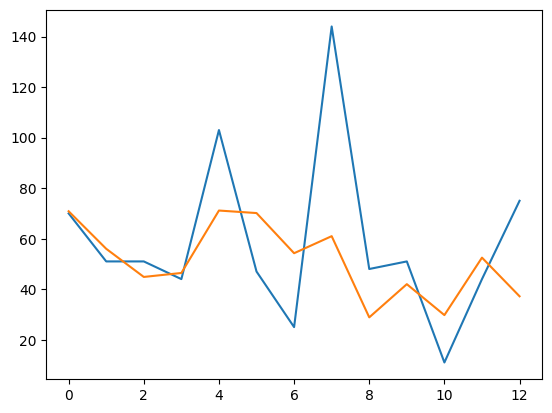

In [48]:
from scipy.stats import ttest_rel

actuals, neighbors = extract_test_control(grid_object.grid_info(), 
                                          ranunculus_glacialis_grid.grid_info(), richness, 'h3_cell')
print(ttest_rel(actuals, neighbors))

plt.plot(actuals)
plt.plot(neighbors)

In [36]:
perisoreus_infastius_df, perisoreus_infastius_grid = create_keystone_grid('perisoreusinfastius')
perisoreus_infastius_grid.grid_info()

,h3_cell,observations_id,count,neighbors
0,85012687fffffff,"[141, 212, 3801, 4077, 4177, 4192, 4269, 4270,...",21,"{85012687fffffff, 85012683fffffff, 850126b3fff..."
1,8508884ffffffff,[16413],1,"{85088ab7fffffff, 8508887bfffffff, 85088ab3fff..."
2,850889c3fffffff,"[31, 2258, 2259, 2260, 2358, 2749, 3522, 3523,...",268,"{850889dbfffffff, 850889c3fffffff, 850889d3fff..."
3,85088adbfffffff,[16701],1,"{85089d37fffffff, 85088ac3fffffff, 85088adbfff..."
4,85088b4ffffffff,"[3715, 16696]",2,"{85088b47fffffff, 851124b7fffffff, 85088b7bfff..."
5,85089937fffffff,"[4025, 4060, 4063, 11834]",4,"{851124dbfffffff, 85089923fffffff, 850899affff..."
6,8508994bfffffff,[13854],1,"{85089b97fffffff, 85089943fffffff, 8508994bfff..."
7,8508c0cffffffff,"[72, 75, 85, 113, 114, 321, 4004, 4026, 4040, ...",36,"{8508c0cffffffff, 8508c0c3fffffff, 8508c0c7fff..."
8,8508c353fffffff,"[3, 13, 36, 37, 49, 110, 112, 457, 458, 459, 5...",223,"{8508c343fffffff, 8508c3cffffffff, 8508c227fff..."
9,8508c3a7fffffff,"[2, 7, 27, 217, 451, 452, 453, 454, 498, 592, ...",509,"{8508ced3fffffff, 8508c3a3fffffff, 8508c3affff..."


# pairs: 37
TtestResult(statistic=-1.3131797032118127, pvalue=0.19743138416787323, df=36)


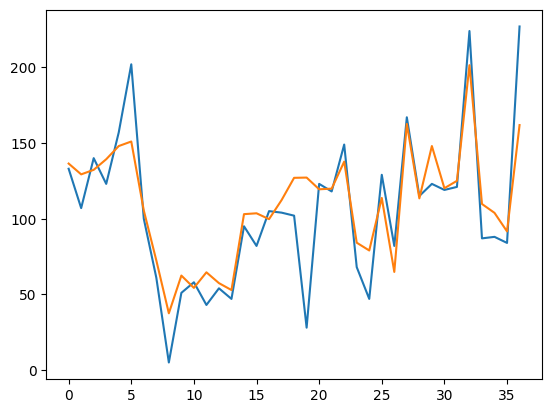

In [49]:
actuals, neighbors = extract_test_control(grid_object.grid_info(), 
                                          perisoreus_infastius_grid.grid_info(), richness, 'h3_cell')
print(ttest_rel(actuals, neighbors))

plt.plot(actuals)
plt.plot(neighbors)

In [39]:
perisoreus_infaustus_df, perisoreus_infaustus_grid = create_keystone_grid('perisoreusinfaustus')
perisoreus_infaustus_grid.grid_info()

,h3_cell,observations_id,count,neighbors
0,85012687fffffff,"[84, 136, 166, 185, 254, 314, 2474, 2606, 2769...",14,"{85012687fffffff, 85012683fffffff, 850126b3fff..."
1,850889c3fffffff,"[2, 117, 312, 413, 414, 415, 416, 515, 516, 51...",51,"{850889dbfffffff, 850889c3fffffff, 850889d3fff..."
2,85088b4ffffffff,[6345],1,"{85088b47fffffff, 851124b7fffffff, 85088b7bfff..."
3,85089937fffffff,"[6655, 6690, 6693]",3,"{851124dbfffffff, 85089923fffffff, 850899affff..."
4,8508c0cffffffff,"[30, 34, 2504, 2508, 2523, 2579, 2587, 2700, 2...",20,"{8508c0cffffffff, 8508c0c3fffffff, 8508c0c7fff..."
5,8508c353fffffff,"[1, 4, 51, 100, 113, 138, 187, 197, 198, 555, ...",101,"{8508c343fffffff, 8508c3cffffffff, 8508c227fff..."
6,8508c3a7fffffff,"[16, 134, 174, 181, 206, 240, 272, 285, 286, 3...",132,"{8508ced3fffffff, 8508c3a3fffffff, 8508c3affff..."
7,8508c56bfffffff,"[5, 8, 25, 32, 33, 36, 40, 43, 46, 74, 85, 86,...",3321,"{8508c0a7fffffff, 8508c56bfffffff, 8508c56ffff..."
8,8508c66bfffffff,[2800],1,"{8508c2d3fffffff, 8508d5a7fffffff, 8508c67bfff..."
9,8508c85bfffffff,"[93, 94, 95, 96, 97, 124, 128, 129, 131, 132, ...",99,"{8508c84bfffffff, 8508c85bfffffff, 8508c853fff..."


# pairs: 32
TtestResult(statistic=-1.9482157940813456, pvalue=0.060491991955555484, df=31)


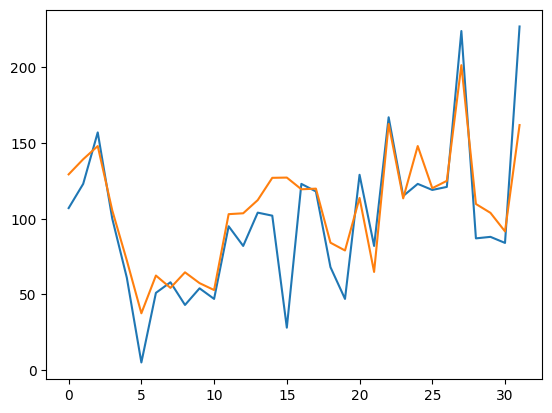

In [50]:
actuals, neighbors = extract_test_control(grid_object.grid_info(), 
                                          perisoreus_infaustus_grid.grid_info(), richness, 'h3_cell')
print(ttest_rel(actuals, neighbors))

plt.plot(actuals)
plt.plot(neighbors)

In [41]:
populus_tremola_df, populus_tremola_grid = create_keystone_grid('populustremola')
populus_tremola_grid.grid_info()

,h3_cell,observations_id,count,neighbors
0,85012613fffffff,[4321],1,"{850126c7fffffff, 85012603fffffff, 85012617fff..."
1,8501261bfffffff,[4298],1,"{850126c7fffffff, 85012657fffffff, 85012603fff..."
2,85012657fffffff,"[4305, 4306, 4307, 4308, 4841]",5,"{85012647fffffff, 85012653fffffff, 85012657fff..."
3,8501268bfffffff,"[4327, 7962]",2,"{850126c7fffffff, 85012683fffffff, 8501268bfff..."
4,85012693fffffff,"[4323, 4328]",2,"{85012683fffffff, 8508cdaffffffff, 8508cd37fff..."
...,...,...,...,...
1531,851f6043fffffff,[877],1,"{851f6047fffffff, 851f604ffffffff, 851f604bfff..."
1532,851f61c3fffffff,[7970],1,"{851f61dbfffffff, 851f61d7fffffff, 851f61c7fff..."
1533,851f654bfffffff,[879],1,"{851f6097fffffff, 851f6543fffffff, 851f655bfff..."
1534,851f65d7fffffff,[7961],1,"{85089a4bfffffff, 851f659bfffffff, 851f65d7fff..."


# pairs: 1512
TtestResult(statistic=5.3682655106537265, pvalue=9.190244432361428e-08, df=1511)


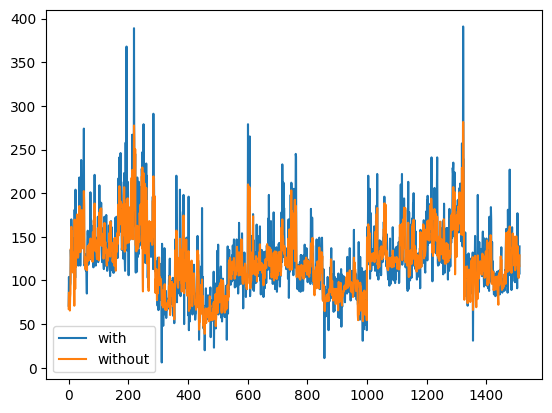

In [52]:
actuals, neighbors = extract_test_control(grid_object.grid_info(), 
                                          populus_tremola_grid.grid_info(), richness, 'h3_cell')
print(ttest_rel(actuals, neighbors))

plt.plot(actuals, label = "with")
plt.plot(neighbors, label = "without")
plt.legend()